In [156]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("darkgrid")

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import collections

from scipy.stats import boxcox
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats import norm
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

%matplotlib inline

In [157]:
df = pd.read_csv("Prepared_Data/application_data.csv")
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             0   
1      100003       0                   1            0             0   
2      100004       0                   0            1             1   
3      100006       0                   1            0             0   
4      100007       0                   1            1             0   

   CNT_CHILDREN  AMT_GOODS_PRICE  NAME_EDUCATION_TYPE  OWN_CAR_AGE  \
0             0         351000.0                    2          0.0   
1             0        1129500.0                    4          0.0   
2             0         135000.0                    2         26.0   
3             0         297000.0                    2          0.0   
4             0         513000.0                    2          0.0   

   OCCUPATION_TYPE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              0.0                     2                            2   
1              1.0                     1                            1   
2              0.0                     2                            2   
3              0.0                     2                            2   
4              1.0                     2                            2   

   ORGANIZATION_TYPE  INCOME_CLASS  REGION_POPULATION_RELATIVE  \
0                  2             2                    0.018801   
1                  0             3                    0.003541   
2                  0             0                    0.010032   
3                  2             1                    0.008019   
4                  0             1                    0.028663   

   COMMONAREA_AVG  FLOORSMIN_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0143         0.1250                   0.0000             0.0000   
1          0.0605         0.3333                   0.0039             0.0098   
2          0.0000         0.0000                   0.0000             0.0000   
3          0.0000         0.0000                   0.0000             0.0000   
4          0.0000         0.0000                   0.0000             0.0000   

   YEARS_BUILD_MODE  YEARS_BEGINEXPLUATATION_MEDI  LANDAREA_MEDI  \
0            0.6341                        0.9722         0.0375   
1            0.8040                        0.9851         0.0132   
2            0.0000                        0.0000         0.0000   
3            0.0000                        0.0000         0.0000   
4            0.0000                        0.0000         0.0000   

   BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA  FLAG_OWN_REALTY  \
0                                   0.1249                1   
1                                   0.2223                0   
2                                   0.0000                1   
3                                   0.0000                1   
4                                   0.0000                1   

   TOTAL_DOCUMENT_SUBMITTED_LE  TOTAL_DOCUMENT_SUBMITTED_GT  \
0                            0                            1   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            1                            0   

   total_amt_req_credit_bureau  COMMUNICATION_CHANNEL_ALTERNATE  \
0                          1.0                                2   
1                          0.0                                2   
2                          0.0                                3   
3                          0.0                                2   
4                          0.0                                2   

   COMMUNICATION_CHANNEL_DIRECT  DEFAULT_SOCIAL_CIRCLE  OBS_SOCIAL_CIRCLE  \
0                             1                    4.0                4.0   
1                             1                    0.0                2.0   
2                             1

In [158]:
df.shape

(307511, 59)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   SK_ID_CURR                               307511 non-null  int64  
 1   TARGET                                   307511 non-null  int64  
 2   NAME_CONTRACT_TYPE                       307511 non-null  int64  
 3   CODE_GENDER                              307511 non-null  int64  
 4   FLAG_OWN_CAR                             307511 non-null  int64  
 5   CNT_CHILDREN                             307511 non-null  int64  
 6   AMT_GOODS_PRICE                          307511 non-null  float64
 7   NAME_EDUCATION_TYPE                      307511 non-null  int64  
 8   OWN_CAR_AGE                              307511 non-null  float64
 9   OCCUPATION_TYPE                          307511 non-null  float64
 10  REGION_RATING_CLIENT            

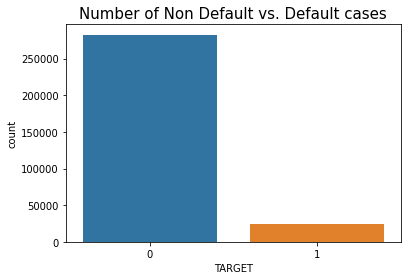

In [160]:
#Default vs. Non-Default
sns.countplot('TARGET', data=df)
plt.title('Number of Non Default vs. Default cases', fontsize = 15);

In [161]:
df.TARGET.value_counts()[1]

24825

In [162]:
print('Percentage of No Frauds: {}%'.format(round(df.TARGET.value_counts()[0]/len(df) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(df.TARGET.value_counts()[1]/len(df) * 100.0,2)))

Percentage of No Frauds: 91.93%
Percentage of Frauds: 8.07%


In [163]:
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             0   
1      100003       0                   1            0             0   
2      100004       0                   0            1             1   
3      100006       0                   1            0             0   
4      100007       0                   1            1             0   

   CNT_CHILDREN  AMT_GOODS_PRICE  NAME_EDUCATION_TYPE  OWN_CAR_AGE  \
0             0         351000.0                    2          0.0   
1             0        1129500.0                    4          0.0   
2             0         135000.0                    2         26.0   
3             0         297000.0                    2          0.0   
4             0         513000.0                    2          0.0   

   OCCUPATION_TYPE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              0.0                     2                            2   
1              1.0                     1                            1   
2              0.0                     2                            2   
3              0.0                     2                            2   
4              1.0                     2                            2   

   ORGANIZATION_TYPE  INCOME_CLASS  REGION_POPULATION_RELATIVE  \
0                  2             2                    0.018801   
1                  0             3                    0.003541   
2                  0             0                    0.010032   
3                  2             1                    0.008019   
4                  0             1                    0.028663   

   COMMONAREA_AVG  FLOORSMIN_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0143         0.1250                   0.0000             0.0000   
1          0.0605         0.3333                   0.0039             0.0098   
2          0.0000         0.0000                   0.0000             0.0000   
3          0.0000         0.0000                   0.0000             0.0000   
4          0.0000         0.0000                   0.0000             0.0000   

   YEARS_BUILD_MODE  YEARS_BEGINEXPLUATATION_MEDI  LANDAREA_MEDI  \
0            0.6341                        0.9722         0.0375   
1            0.8040                        0.9851         0.0132   
2            0.0000                        0.0000         0.0000   
3            0.0000                        0.0000         0.0000   
4            0.0000                        0.0000         0.0000   

   BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA  FLAG_OWN_REALTY  \
0                                   0.1249                1   
1                                   0.2223                0   
2                                   0.0000                1   
3                                   0.0000                1   
4                                   0.0000                1   

   TOTAL_DOCUMENT_SUBMITTED_LE  TOTAL_DOCUMENT_SUBMITTED_GT  \
0                            0                            1   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            1                            0   

   total_amt_req_credit_bureau  COMMUNICATION_CHANNEL_ALTERNATE  \
0                          1.0                                2   
1                          0.0                                2   
2                          0.0                                3   
3                          0.0                                2   
4                          0.0                                2   

   COMMUNICATION_CHANNEL_DIRECT  DEFAULT_SOCIAL_CIRCLE  OBS_SOCIAL_CIRCLE  \
0                             1                    4.0                4.0   
1                             1                    0.0                2.0   
2                             1

In [164]:
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             0   
1      100003       0                   1            0             0   
2      100004       0                   0            1             1   
3      100006       0                   1            0             0   
4      100007       0                   1            1             0   

   CNT_CHILDREN  AMT_GOODS_PRICE  NAME_EDUCATION_TYPE  OWN_CAR_AGE  \
0             0         351000.0                    2          0.0   
1             0        1129500.0                    4          0.0   
2             0         135000.0                    2         26.0   
3             0         297000.0                    2          0.0   
4             0         513000.0                    2          0.0   

   OCCUPATION_TYPE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              0.0                     2                            2   
1              1.0                     1                            1   
2              0.0                     2                            2   
3              0.0                     2                            2   
4              1.0                     2                            2   

   ORGANIZATION_TYPE  INCOME_CLASS  REGION_POPULATION_RELATIVE  \
0                  2             2                    0.018801   
1                  0             3                    0.003541   
2                  0             0                    0.010032   
3                  2             1                    0.008019   
4                  0             1                    0.028663   

   COMMONAREA_AVG  FLOORSMIN_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0143         0.1250                   0.0000             0.0000   
1          0.0605         0.3333                   0.0039             0.0098   
2          0.0000         0.0000                   0.0000             0.0000   
3          0.0000         0.0000                   0.0000             0.0000   
4          0.0000         0.0000                   0.0000             0.0000   

   YEARS_BUILD_MODE  YEARS_BEGINEXPLUATATION_MEDI  LANDAREA_MEDI  \
0            0.6341                        0.9722         0.0375   
1            0.8040                        0.9851         0.0132   
2            0.0000                        0.0000         0.0000   
3            0.0000                        0.0000         0.0000   
4            0.0000                        0.0000         0.0000   

   BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA  FLAG_OWN_REALTY  \
0                                   0.1249                1   
1                                   0.2223                0   
2                                   0.0000                1   
3                                   0.0000                1   
4                                   0.0000                1   

   TOTAL_DOCUMENT_SUBMITTED_LE  TOTAL_DOCUMENT_SUBMITTED_GT  \
0                            0                            1   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            1                            0   

   total_amt_req_credit_bureau  COMMUNICATION_CHANNEL_ALTERNATE  \
0                          1.0                                2   
1                          0.0                                2   
2                          0.0                                3   
3                          0.0                                2   
4                          0.0                                2   

   COMMUNICATION_CHANNEL_DIRECT  DEFAULT_SOCIAL_CIRCLE  OBS_SOCIAL_CIRCLE  \
0                             1                    4.0                4.0   
1                             1                    0.0                2.0   
2                             1

In [78]:
def calculate_woe_iv(dataset, feature, target):
   
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
         
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')

    
    return dset, iv

In [79]:
dset, iv = calculate_woe_iv(df, "ORGANIZATION_TYPE", "TARGET")
dset = dset.set_index("Value")
Organization_WOE = dset[["WoE"]].to_dict()
Organization_WOE = Organization_WOE["WoE"]

In [80]:
df["ORGANIZATION_TYPE"] = df["ORGANIZATION_TYPE"].replace(Organization_WOE)

In [81]:
dset, iv = calculate_woe_iv(df, "NAME_EDUCATION_TYPE", "TARGET")
dset = dset.set_index("Value")
Organization_WOE = dset[["WoE"]].to_dict()
Organization_WOE = Organization_WOE["WoE"]
df["NAME_EDUCATION_TYPE"] = df["NAME_EDUCATION_TYPE"].replace(Organization_WOE)

In [82]:
dset, iv = calculate_woe_iv(df, "FONDKAPREMONT_MODE", "TARGET")
dset = dset.set_index("Value")
Organization_WOE = dset[["WoE"]].to_dict()
Organization_WOE = Organization_WOE["WoE"]
df["FONDKAPREMONT_MODE"] = df["FONDKAPREMONT_MODE"].replace(Organization_WOE)

In [83]:
dset, iv = calculate_woe_iv(df, "NAME_HOUSING_TYPE", "TARGET")
dset = dset.set_index("Value")
Organization_WOE = dset[["WoE"]].to_dict()
Organization_WOE = Organization_WOE["WoE"]
df["NAME_HOUSING_TYPE"] = df["NAME_HOUSING_TYPE"].replace(Organization_WOE)

In [84]:
dset, iv = calculate_woe_iv(df, "NAME_TYPE_SUITE", "TARGET")
dset = dset.set_index("Value")
Organization_WOE = dset[["WoE"]].to_dict()
Organization_WOE = Organization_WOE["WoE"]
df["NAME_TYPE_SUITE"] = df["NAME_TYPE_SUITE"].replace(Organization_WOE)

In [85]:
dset, iv = calculate_woe_iv(df, "NAME_FAMILY_STATUS", "TARGET")
dset = dset.set_index("Value")
Organization_WOE = dset[["WoE"]].to_dict()
Organization_WOE = Organization_WOE["WoE"]
df["NAME_FAMILY_STATUS"] = df["NAME_FAMILY_STATUS"].replace(Organization_WOE)

In [86]:
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             0   
1      100003       0                   1            0             0   
2      100004       0                   0            1             1   
3      100006       0                   1            0             0   
4      100007       0                   1            1             0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  DAYS_BIRTH  \
0          Working            -0.111494           -0.213706          26   
1    State servant             0.441116            0.071222          46   
2          Working            -0.111494           -0.213706          53   
3          Working            -0.111494           -0.229088          53   
4          Working            -0.111494           -0.213706          55   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0              2               10.0                6          0.0   
1              4                4.0                1          0.0   
2              1               12.0                7         26.0   
3              9               27.0                7          0.0   
4              9               12.0               10          0.0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0     LOW SKilled              1.0                     2   
1  Highly SKilled              2.0                     1   
2     LOW SKilled              1.0                     2   
3     LOW SKilled              2.0                     2   
4  Highly SKilled              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  ORGANIZATION_TYPE  INCOME_CLASS  \
0                       10          -0.133552             3   
1                       11           0.334264             3   
2                        9           0.157575             0   
3                       17          -0.133552             1   
4                       11           0.340103             1   

   REGION_POPULATION_RELATIVE  FLOORSMIN_AVG  NONLIVINGAPARTMENTS_AVG  \
0                    0.018801         0.1250                   0.0000   
1                    0.003541         0.3333                   0.0039   
2                    0.010032         0.2083                   0.0000   
3                    0.008019         0.2083                   0.0000   
4                    0.028663         0.2083                   0.0000   

   NONLIVINGAREA_AVG  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  \
0             0.0000                        0.9722            0.6243   
1             0.0098                        0.9851            0.7987   
2             0.0023                        0.9816            0.7585   
3             0.0029                        0.9816            0.7585   
4             0.0029                        0.9816            0.7585   

   COMMONAREA_MEDI  LANDAREA_MEDI  BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA  \
0           0.0144         0.0375                                   0.1249   
1           0.0608         0.0132                                   0.2223   
2           0.01

In [9]:
df = df.drop(["WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"], axis=1)

KeyError: "['WEEKDAY_APPR_PROCESS_START' 'HOUR_APPR_PROCESS_START'] not found in axis"

In [165]:
df["REGION_CITY_RATING_CLIENT"] = df["REGION_RATING_CLIENT"] + df["REGION_RATING_CLIENT_W_CITY"]

In [166]:
df = df.drop(["REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY"],axis=1)

In [90]:
one_hot_encoded_occupation = pd.get_dummies(df["OCCUPATION_TYPE"],prefix="OCCUPATION_TYPE")
  
one_hot_encoded_occupation  = one_hot_encoded_occupation.drop("OCCUPATION_TYPE_Others", axis=1)

df = pd.merge(df, one_hot_encoded_occupation, left_index=True, right_index=True )
df = df.drop("OCCUPATION_TYPE", axis =1)

In [91]:
one_hot_encoded_income= pd.get_dummies(df["NAME_INCOME_TYPE"],prefix="INCOME_TYPE")

one_hot_encoded_income  = one_hot_encoded_income.drop("INCOME_TYPE_Others", axis=1)

df = pd.merge(df, one_hot_encoded_income, left_index=True, right_index=True )
df = df.drop("NAME_INCOME_TYPE", axis =1)

In [167]:
corr_dict = dict()
for col in df.columns:
    if col != "TARGET":
        corr_score = df[col].corr(df.TARGET, method="spearman")
        if abs(corr_score) >=0.04:
            corr_dict[col] = corr_score
sorted_dict = {k: v for k, v in sorted(corr_dict.items(), key=lambda item:item[1])}
sorted_dict

{'DAR': -0.0769340543711448,
 'NAME_EDUCATION_TYPE': -0.055737990719786974,
 'LAST_PHONE_CHANGE_MONTH': -0.053780541950201495,
 'MONTH_ID_PUBLISH': -0.052537140303930696,
 'Pensioner': -0.0462094227866205,
 'YEARS_BEGINEXPLUATATION_MEDI': -0.04461031105063068,
 'OCCUPATION_TYPE': -0.041099537218942085,
 'BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA': -0.04055238709320317,
 'MONTH_REGISTRATION': -0.040169827704923076,
 'TOTAL_DOCUMENT_SUBMITTED_GT': 0.044561372583357475,
 'COMMUNICATION_CHANNEL_ALTERNATE': 0.046975609167526806,
 'CITY_WORK_LIVE_REGION': 0.05206331589559075,
 'CODE_GENDER': 0.05471268197127128,
 'ORGANIZATION_TYPE': 0.056837257937297526,
 'Working': 0.05748118481836564,
 'REGION_CITY_RATING_CLIENT': 0.060337876795981814}

In [168]:
col_from_EDA = list(sorted_dict.keys())
col_from_EDA.append("TARGET")
df = df[col_from_EDA]

In [169]:
df.shape

(307511, 17)

In [170]:
#Random Under Sampling
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']


In [29]:
X["AMT_ANNUITY"].describe()

count    307511.000000
mean      27107.516051
std       14494.443757
min           0.000000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

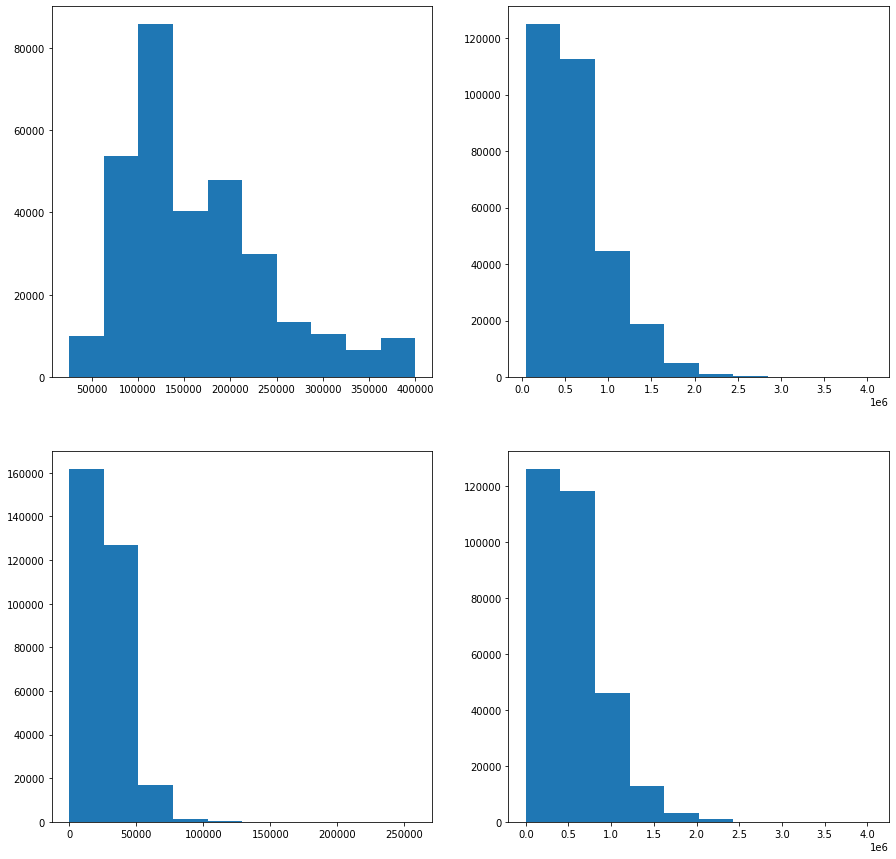

In [30]:

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(X["AMT_INCOME_TOTAL"])
plt.subplot(2,2,2)
plt.hist(X["AMT_CREDIT"])

plt.subplot(2,2,3)
plt.hist(X["AMT_ANNUITY"])
plt.subplot(2,2,4)
plt.hist(X["AMT_GOODS_PRICE"])
plt.show()


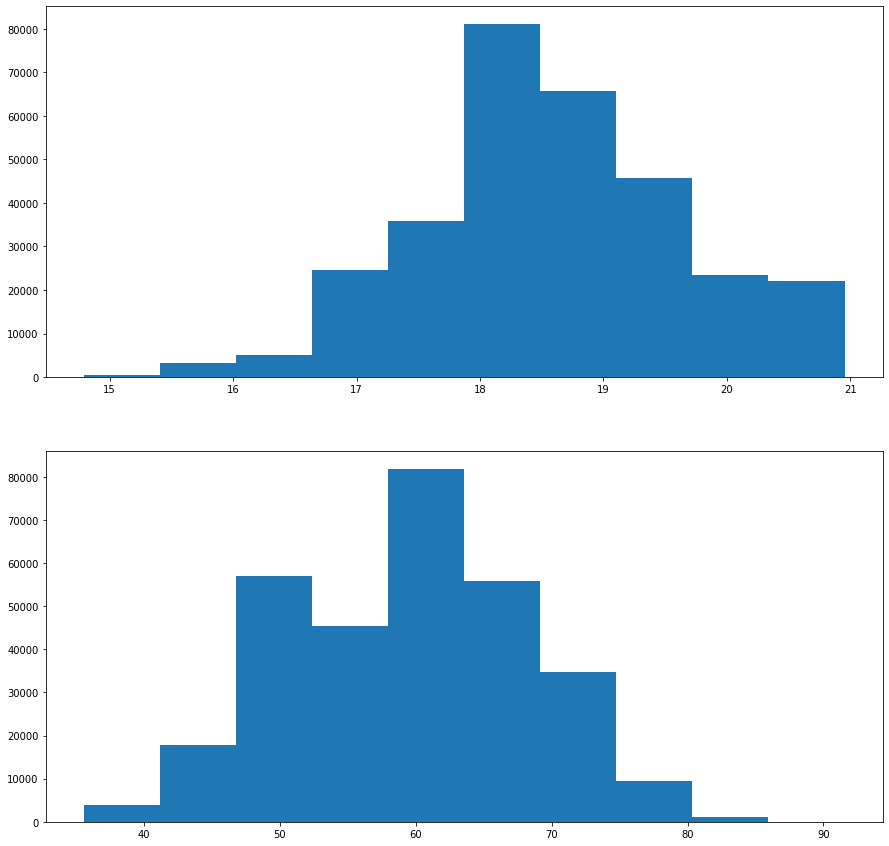

In [31]:

plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
X["AMT_INCOME_TOTAL"] = boxcox(X["AMT_INCOME_TOTAL"])[0]
plt.hist(X["AMT_INCOME_TOTAL"])
plt.subplot(2,1,2)
X["AMT_CREDIT"] = boxcox(X["AMT_CREDIT"])[0]
plt.hist(X["AMT_CREDIT"])

plt.show()


In [171]:
rus = RandomUnderSampler(random_state=42)
X_rs, y_rs = rus.fit_sample(X,y)

In [172]:
df_rs = pd.merge(X_rs, y_rs, left_index=True,right_index=True)
df_rs.shape

(49650, 17)

In [173]:
def naive_predictor(df):
    TP = df.TARGET.count() - np.sum(df.TARGET)
    FP = np.sum(df.TARGET)
    TN = 0
    FN = 0
    
    # TODO: Calculate accuracy, precision and recall
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    recall = TP/(TP+FN)
    precision = TP/(TP+FP)
    
    # TODO: Calculate F-score using the formula above for beta = 1 and correct values for precision and recall.
    fscore = (2*precision*recall)/(precision + recall)
    
    # Print the results 
    print("[Accuracy score: {:.4f}, precision: {:.4f}, recall: {:.4f}, f1-score: {:.4f}]".format(accuracy, precision, recall, fscore))
    
print('Naive predictor for original dataset:')
naive_predictor(df)
print('-'*117)
print('Naive predictor for undersampled dataset:')
naive_predictor(df_rs)

Naive predictor for original dataset:
[Accuracy score: 0.9193, precision: 0.9193, recall: 1.0000, f1-score: 0.9579]
---------------------------------------------------------------------------------------------------------------------
Naive predictor for undersampled dataset:
[Accuracy score: 0.5000, precision: 0.5000, recall: 1.0000, f1-score: 0.6667]


In [174]:
# Undersampling before cross validation(prove to overfit)
#X = df_rs.drop('TARGET', axis=1)
#y = df_rs['TARGET']

In [175]:
#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
rus = RandomUnderSampler(random_state=42)
X_rs, y_rs = rus.fit_sample(X_train,y_train)

In [177]:
y_rs.sum()

19876

In [178]:
X_train = X_rs.copy()
y_train = y_rs.copy()

In [179]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = X_train_stand.columns

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler()
    
    # transform the training data column
    X_train_stand[i] = scale.fit_transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [180]:
#Convert to arrays to feed to the classifications algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000,n_jobs=-1),
    "Support Vector Classifier": LinearSVC(dual=False, random_state=0),
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(max_depth = 6, n_jobs=-1),
    "Gradient Boosting":XGBClassifier(objective='binary:logistic',max_depth =3, n_estimators=10, eval_metric='logloss', seed=123, n_jobs=-1,verbosity=3)
}

In [181]:
#Calculate the cross-validation score for each classifier 8;24
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
        classifier.fit(X_train_stand, y_train)
        cv_score = cross_val_score(classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
        precision = cross_val_score(classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
        recall = cross_val_score(classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
        auc = cross_val_score(classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
        print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))
    

Cross-Validation Scores:-
[08:11:41] ======== Monitor: Learner ========
[08:11:41] Configure: 0.000267s, 1 calls @ 267us

[08:11:41] ======== Monitor: GBTree ========
[08:11:41] ======== Monitor: TreePruner ========
Logistic Regression: 60.75 : 62.01 : 60.54 : 64.76
Support Vector Classifier: 60.71 : 62.13 : 60.52 : 64.75
Decision Tree: 53.45 : 53.66 : 53.62 : 53.86
RandomForest: 60.49 : 61.01 : 60.49 : 65.02
[08:12:07] DEBUG: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/gbm/gbtree.cc:154: Using tree method: 2
[08:12:08] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[08:12:08] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[08:12:08] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree

In [182]:
 params = {
    "Logistic Regression": {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1]},
    "Decision Tree": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "RandomForest": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "Gradient Boosting":{
     "eta"    : [0.05, 0.10, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5],
     "gamma"            : [ 0.1, 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.5 , 0.7 ]
     }

}

In [183]:
#Using Grid search for finding the most optimal hyperparameters
def randomsearch(classifier, params):
    k = StratifiedKFold(n_splits=10)
    grid_classifier = RandomizedSearchCV(classifier, params, cv = k, n_jobs=-1)
    grid_classifier.fit(X_train_stand, y_train)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [184]:
#Using Grid search for finding the most optimal hyperparameters
def gridsearch(classifier, params):
    grid_classifier = GridSearchCV(classifier, params,n_jobs=-1)
    grid_classifier.fit(X_train_SMOTE, y_train_SMOTE)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [185]:
#Scores after applying Grid Search
hyperparameter_tuned_classfier = dict()
print('Cross-Validation Scores after applying RandomSearch:-')
for key, classifier in classifiers.items():
    tuned_classifier = randomsearch(classifier,params[key])
    hyperparameter_tuned_classfier[key] =tuned_classifier
    cv_score = cross_val_score(tuned_classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
    precision = cross_val_score(tuned_classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
    recall = cross_val_score(tuned_classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
    auc = cross_val_score(tuned_classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
    print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))

Cross-Validation Scores after applying RandomSearch:-
Logistic Regression: 60.8 : 61.99 : 60.49 : 64.75
Support Vector Classifier: 60.79 : 62.08 : 60.46 : 64.76
Decision Tree: 58.38 : 54.77 : 58.89 : 59.04
RandomForest: 59.81 : 61.49 : 59.56 : 63.84
[08:14:44] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[08:14:44] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[08:14:44] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[08:14:44] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[08:14:44] INFO: /home/conda/f

In [186]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    #plt.figure()
    plt.title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

[08:15:04] ======== Monitor: Learner ========
[08:15:04] Configure: 0.000294s, 1 calls @ 294us

[08:15:04] ======== Monitor: GBTree ========
[08:15:04] ======== Monitor: TreePruner ========


<module 'matplotlib.pyplot' from '/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

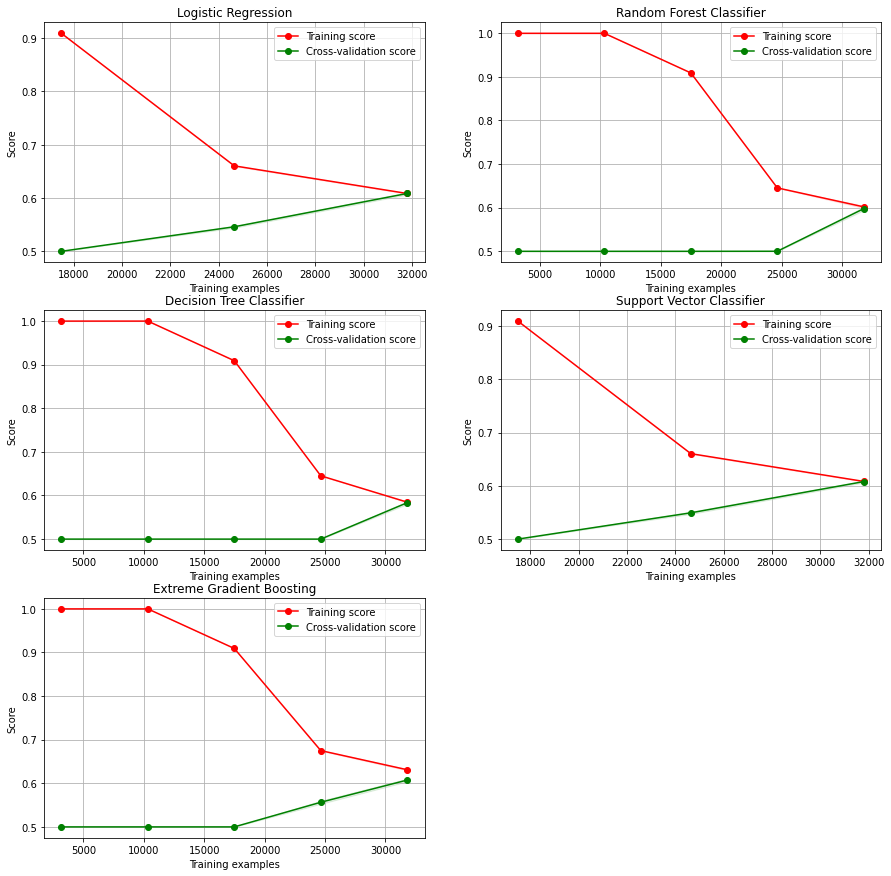

In [187]:
#Variables
n_jobs = 10
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

#Classifiers
log_reg = hyperparameter_tuned_classfier["Logistic Regression"]
svc = hyperparameter_tuned_classfier["Support Vector Classifier"]
decision_tree = hyperparameter_tuned_classfier["Decision Tree"]
RandomForest = hyperparameter_tuned_classfier["RandomForest"]
xgboost = hyperparameter_tuned_classfier["Gradient Boosting"]

#log_reg = randomsearch(LogisticRegression(), params['Logistic Regression'])
#svc = randomsearch(LinearSVC(), params['Support Vector Classifier'])
#decision_tree = randomsearch(DecisionTreeClassifier(), params['Decision Tree'])
#RandomForest = randomsearch(RandomForestClassifier(), params['RandomForest'])
#xgboost = randomsearch(XGBClassifier(), params['Gradient Boosting'])

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plot_learning_curve(log_reg, 'Logistic Regression', X_train_stand, y_train, n_jobs=-1)

plt.subplot(3,2,2)
plot_learning_curve(RandomForest, 'Random Forest Classifier', X_train_stand, y_train, n_jobs=-1)

plt.subplot(3,2,3)
plot_learning_curve(decision_tree, 'Decision Tree Classifier', X_train_stand, y_train, n_jobs=-1)

plt.subplot(3,2,4)
plot_learning_curve(svc, 'Support Vector Classifier', X_train_stand, y_train, n_jobs=-1)

plt.subplot(3,2,5)
plot_learning_curve(xgboost, 'Extreme Gradient Boosting', X_train_stand, y_train, n_jobs=-1)

#plt.show()

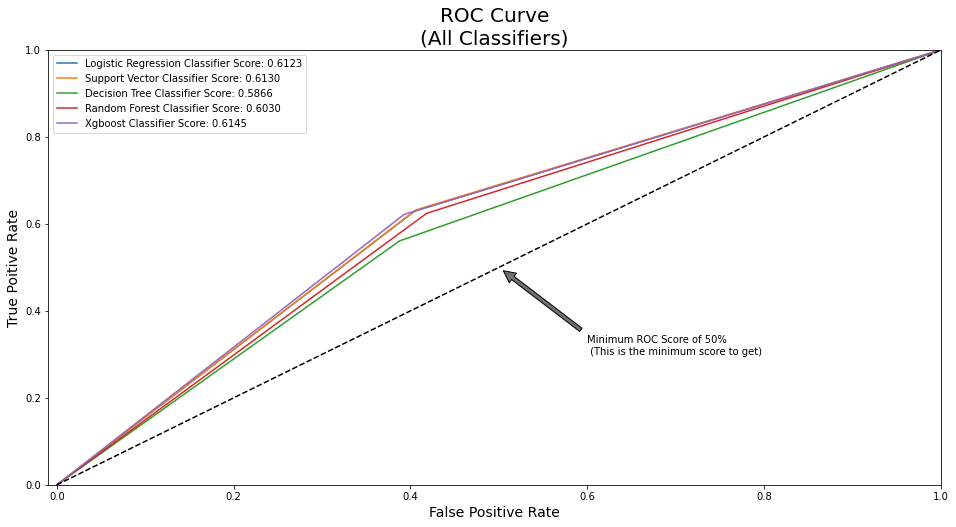

In [188]:
#ROC Curve
'''log_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
tree_pred = cross_val_predict(decision_tree, X_train, y_train, cv=5)
knear_pred = cross_val_predict(knearest, X_train, y_train, cv=5)'''

log_pred = log_reg.predict(X_test_stand)
svc_pred = svc.predict(X_test_stand)
tree_pred = decision_tree.predict(X_test_stand)
RandomForeest_pred = RandomForest.predict(X_test_stand)
Xgboost_pred = xgboost.predict(X_test_stand)

log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_test, RandomForeest_pred)
xgboost_fpr, xgboost_tpr, xgboost_threshold = roc_curve(y_test, Xgboost_pred)

plt.figure(figsize=(16,8))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))

plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, RandomForeest_pred)))
plt.plot(xgboost_fpr, xgboost_tpr, label='Xgboost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, Xgboost_pred)))

plt.plot([0,1],[0,1],'k--')
plt.axis([-0.01, 1, 0, 1])

plt.title('ROC Curve\n(All Classifiers)', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Poitive Rate', fontsize=14)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
plt.show()

In [189]:
labels = ['Non-Default', 'Default']

print('Logistic Regression:')
print(classification_report(y_test, log_pred, target_names=labels))

print('Support Vector Classifier:')
print(classification_report(y_test, svc_pred, target_names=labels))

print('Decision Tree:')
print(classification_report(y_test, tree_pred, target_names=labels))

print('Random Forest Classifier:')
print(classification_report(y_test, RandomForeest_pred, target_names=labels))

print('Extreme Gradient Boosting Classifier:')
print(classification_report(y_test, Xgboost_pred, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

 Non-Default       0.95      0.60      0.73     56554
     Default       0.12      0.63      0.20      4949

    accuracy                           0.60     61503
   macro avg       0.53      0.61      0.47     61503
weighted avg       0.88      0.60      0.69     61503

Support Vector Classifier:
              precision    recall  f1-score   support

 Non-Default       0.95      0.59      0.73     56554
     Default       0.12      0.63      0.20      4949

    accuracy                           0.60     61503
   macro avg       0.53      0.61      0.47     61503
weighted avg       0.88      0.60      0.69     61503

Decision Tree:
              precision    recall  f1-score   support

 Non-Default       0.94      0.61      0.74     56554
     Default       0.11      0.56      0.19      4949

    accuracy                           0.61     61503
   macro avg       0.53      0.59      0.46     61503
weighted av

In [190]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[33651 22903]
 [ 1833  3116]]
Confusion matrix, without normalization
[[33594 22960]
 [ 1821  3128]]
Confusion matrix, without normalization
[[34636 21918]
 [ 2174  2775]]
Confusion matrix, without normalization
[[32893 23661]
 [ 1859  3090]]
Confusion matrix, without normalization
[[34341 22213]
 [ 1872  3077]]
Confusion matrix, without normalization
[[56554     0]
 [    0  4949]]


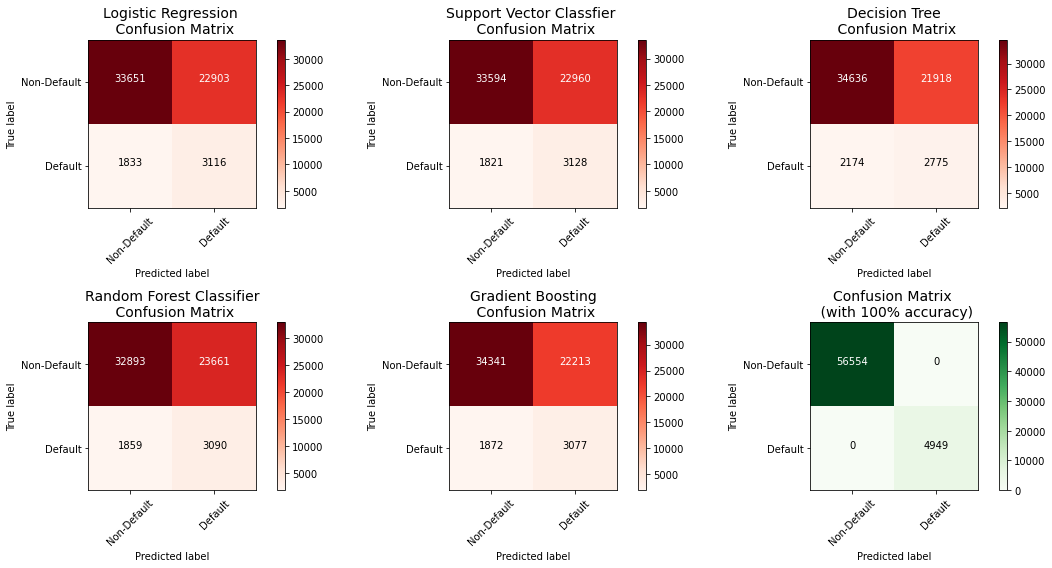

In [191]:
from sklearn.metrics import confusion_matrix
log_reg_cm = confusion_matrix(y_test, log_reg.predict(X_test_stand))
svc_cm = confusion_matrix(y_test, svc.predict(X_test_stand))
dt_cm = confusion_matrix(y_test, decision_tree.predict(X_test_stand))
RF_cm = confusion_matrix(y_test, RandomForest.predict(X_test_stand))
xgboost_cm = confusion_matrix(y_test, xgboost.predict(X_test_stand))

actual_cm = confusion_matrix(y_test, y_test)
labels = ['Non-Default', 'Default']


fig = plt.figure(figsize=(16,8))

fig.add_subplot(231)
plot_confusion_matrix(log_reg_cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(232)
plot_confusion_matrix(svc_cm, labels, title="Support Vector Classfier \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(233)
plot_confusion_matrix(dt_cm, labels, title="Decision Tree\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(234)
plot_confusion_matrix(RF_cm, labels, title="Random Forest Classifier\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(235)
plot_confusion_matrix(xgboost_cm, labels, title="Gradient Boosting\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(236)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.show()

Logistic - Regression Feature: 0, Score: 0.01842
Logistic - Regression Feature: 1, Score: -0.14838
Logistic - Regression Feature: 2, Score: -0.16128
Logistic - Regression Feature: 3, Score: -0.13214
Logistic - Regression Feature: 4, Score: -0.02727
Logistic - Regression Feature: 5, Score: -0.02311
Logistic - Regression Feature: 6, Score: -0.03070
Logistic - Regression Feature: 7, Score: -0.02091
Logistic - Regression Feature: 8, Score: -0.08429
Logistic - Regression Feature: 9, Score: -0.06995
Logistic - Regression Feature: 10, Score: -0.01878
Logistic - Regression Feature: 11, Score: -0.00536
Logistic - Regression Feature: 12, Score: -0.00420
Logistic - Regression Feature: 13, Score: -0.15002
Logistic - Regression Feature: 14, Score: -0.01363
Logistic - Regression Feature: 15, Score: -0.00897
Logistic - Regression Feature: 16, Score: -0.07439
Logistic - Regression Feature: 17, Score: 0.14336
Logistic - Regression Feature: 18, Score: 0.10141
Logistic - Regression Feature: 19, Score: 0.

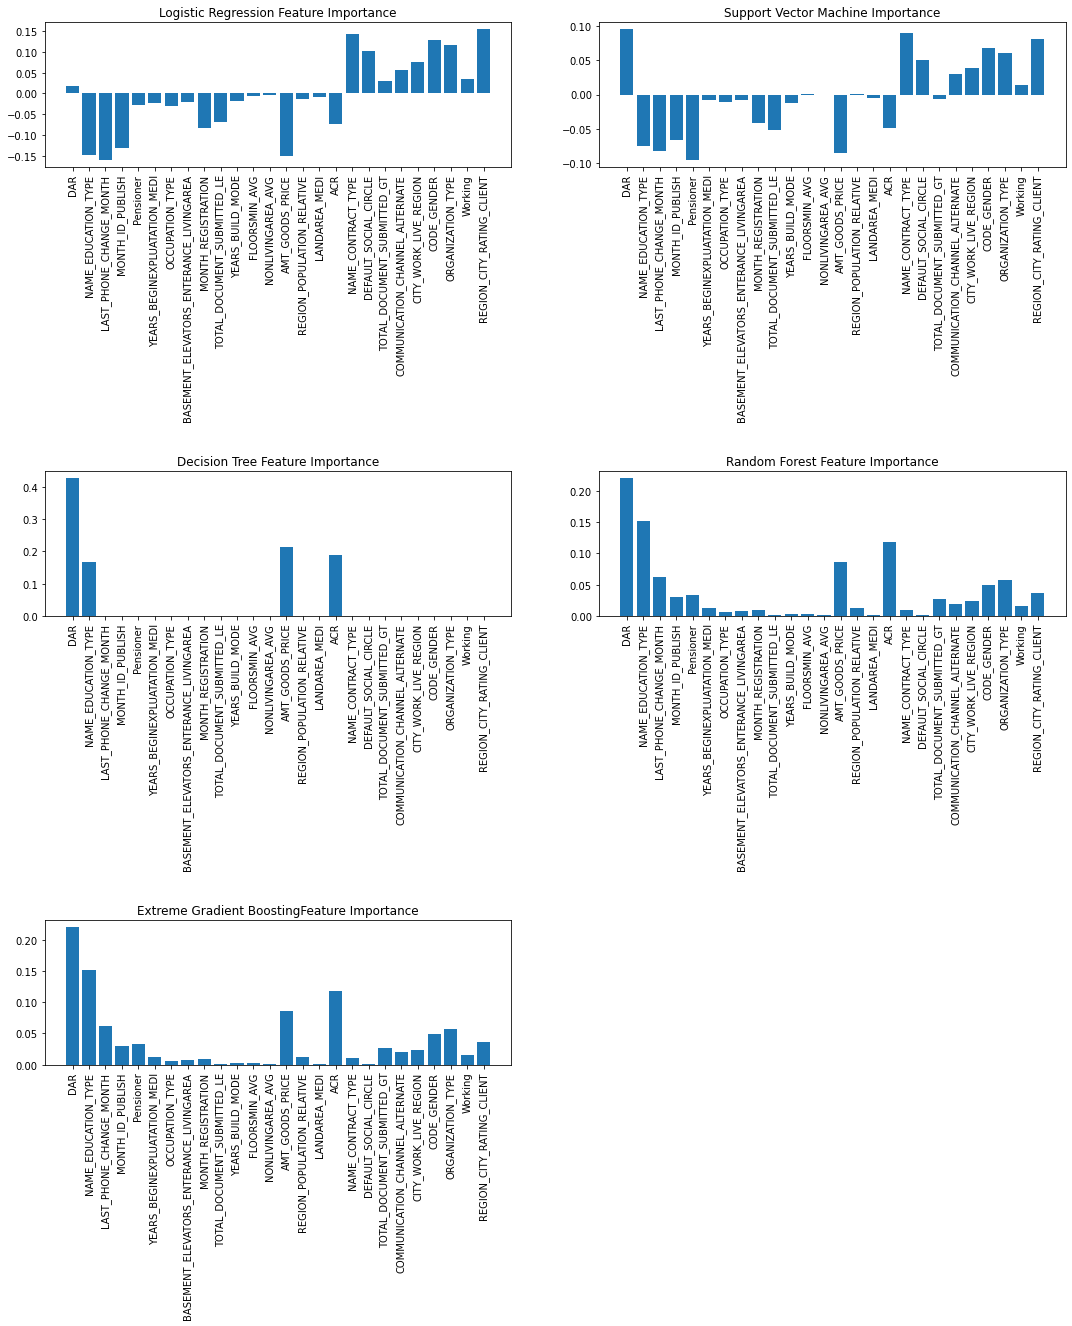

In [155]:
cols = list(X.columns)
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
importance_log_reg = log_reg.coef_[0]

for i,v in enumerate(importance_log_reg):
    print('Logistic - Regression Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_log_reg)
plt.xticks(rotation = 90)
plt.title("Logistic Regression Feature Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,2)
importance_svc = svc.coef_[0]
print(importance_svc)
for i,v in enumerate(importance_svc):
    print('SVM: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_svc)
plt.xticks(rotation = 90)
plt.title("Support Vector Machine Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,3)
# get importance
importance_decision_tree = decision_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_decision_tree):
	print('Decision Tree-Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_decision_tree)
plt.xticks(rotation = 90)
plt.title("Decision Tree Feature Importance")

plt.subplot(3,2,4)
importance_RandomForest = RandomForest.feature_importances_
for i,v in enumerate(importance_RandomForest):
	print('Random Forest Feature: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Random Forest Feature Importance")

plt.subplot(3,2,5)
importance_Xgboost = xgboost.feature_importances_
for i,v in enumerate(importance_Xgboost):
	print('Extreme Gradient Boosting: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Extreme Gradient BoostingFeature Importance")
plt.xticks(rotation = 90) 
plt.show()



In [114]:
import lime #LIME package
import lime.lime_tabular #the type of LIIME analysis we’ll do
import shap #SHAP package

In [115]:
feature_names = X_train_stand.columns

In [76]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_stand.values, 
                                                   feature_names=feature_names, 
                                                   class_names=["Non Default", "Default"], 
                                                   verbose=True, mode='classification')

In [77]:
predict_fn_lg = lambda x: log_reg.predict_proba(x).astype(float)
predict_fn_svm = lambda x: svc._predict_proba_lr(x).astype(float)
predict_fn_dt = lambda x: decision_tree.predict_proba(x).astype(float)
predict_fn_rf = lambda x: RandomForest.predict_proba(x).astype(float)
predict_fn_xgboost = lambda x: xgboost.predict_proba(x).astype(float)

In [78]:
np.random.seed(1)
i = 19
exp_lg = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_lg, num_features=5)
exp_svm = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_svm, num_features=5)
exp_dt = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_dt, num_features=5)
exp_rf = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_rf, num_features=5)
exp_xgboost = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_xgboost, num_features=5)
#exp_lg.show_in_notebook(show_all=False)

Intercept 0.5317809520445765
Prediction_local [0.44957589]
Right: 2.393184009110483e-14
Intercept 0.5180581019711842
Prediction_local [0.47301752]
Right: 1.3801288598283595e-07
Intercept 0.5504238050468498
Prediction_local [0.33292033]
Right: 0.322248381400824
Intercept 0.530872868508474
Prediction_local [0.43522997]
Right: 0.40572455148777314
Intercept 0.551194901960143
Prediction_local [0.36840092]
Right: 0.420380175113678


In [79]:
exp_lg.show_in_notebook()

In [80]:
exp_dt.show_in_notebook()

In [81]:
exp_rf.show_in_notebook()

In [82]:
exp_xgboost.show_in_notebook()

In [83]:
X_train.head()

DAR  NAME_EDUCATION_TYPE  LAST_PHONE_CHANGE_MONTH  \
44637  0.051282                    2                      0.0   
16171  0.126543                    3                     38.0   
2645   0.015152                    4                      0.0   
22752  0.291667                    4                     70.0   
40327  0.114286                    4                    108.0   

       MONTH_ID_PUBLISH  Pensioner  YEARS_BEGINEXPLUATATION_MEDI  \
44637                10          0                        0.0000   
16171                76          0                        0.0000   
2645                137          0                        0.0000   
22752                92          0                        0.0000   
40327               163          0                        0.9866   

       OCCUPATION_TYPE  BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA  \
44637              0.0                                    0.000   
16171              1.0                                    0.000   
2645               1.0                                    0.000   
22752              1.0                                    0.000   
40327              1.0                                    0.133   

       MONTH_REGISTRATION  TOTAL_DOCUMENT_SUBMITTED_GT  \
44637               309.0                            1   
16171                52.0                            1   
2645                126.0                            1   
22752                36.0                            1   
40327                 4.0                            1   

       COMMUNICATION_CHANNEL_ALTERNATE  CITY_WORK_LIVE_REGION  CODE_GENDER  \
44637                                3                      2            1   
16171                                2                      0            0   
2645                                 2                      2            0   
22752                                2                      0            0   
40327                                2                      0            1   

       ORGANIZATION_TYPE  Working  REGION_CITY_RATING_CLIENT  
44637                  2        1                          4  
16171                  0        1                          6  
2645                   2        0                          4  
22752                  0        0                          4  
40327                  2        0                          4

In [84]:
final_cols = X_train_stand.columns
final_cols

Index(['DAR', 'NAME_EDUCATION_TYPE', 'LAST_PHONE_CHANGE_MONTH',
       'MONTH_ID_PUBLISH', 'Pensioner', 'YEARS_BEGINEXPLUATATION_MEDI',
       'OCCUPATION_TYPE', 'BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA',
       'MONTH_REGISTRATION', 'TOTAL_DOCUMENT_SUBMITTED_GT',
       'COMMUNICATION_CHANNEL_ALTERNATE', 'CITY_WORK_LIVE_REGION',
       'CODE_GENDER', 'ORGANIZATION_TYPE', 'Working',
       'REGION_CITY_RATING_CLIENT'],
      dtype='object')

In [85]:
df_stand = df.copy()

In [86]:
for i in num_cols:    
    # transform the testing data column
    df_stand[i] = scale.transform(df[[i]])
df_stand.head()

DAR  NAME_EDUCATION_TYPE  LAST_PHONE_CHANGE_MONTH  MONTH_ID_PUBLISH  \
0 -4.077112            -2.162877                33.552548         66.291687   
1 -4.075177            -0.178687                23.631596          5.773884   
2 -4.134588            -2.162877                23.631596         80.181019   
3 -3.987958            -2.162877                16.686930         77.204734   
4 -3.993744            -2.162877                32.560452        110.935968   

   Pensioner  YEARS_BEGINEXPLUATATION_MEDI  OCCUPATION_TYPE  \
0  -4.147068                     -3.182553        -4.147068   
1  -4.147068                     -3.169755        -3.154972   
2  -4.147068                     -4.147068        -4.147068   
3  -4.147068                     -4.147068        -4.147068   
4  -4.147068                     -4.147068        -3.154972   

   BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA  MONTH_REGISTRATION  \
0                                -4.023155          116.888539   
1                                -3.926525           35.536738   
2                                -4.147068          136.730442   
3                                -4.147068          321.260137   
4                                -4.147068          138.714632   

   TOTAL_DOCUMENT_SUBMITTED_GT  COMMUNICATION_CHANNEL_ALTERNATE  \
0                    -3.154972                        -2.162877   
1                    -3.154972                        -2.162877   
2                    -4.147068                        -1.170782   
3                    -3.154972                        -2.162877   
4                    -4.147068                        -2.162877   

   CITY_WORK_LIVE_REGION  CODE_GENDER  ORGANIZATION_TYPE   Working  \
0              -4.147068    -3.154972          -2.162877 -3.154972   
1              -4.147068    -4.147068          -4.147068 -4.147068   
2              -4.147068    -3.154972          -4.147068 -3.154972   
3              -4.147068    -4.147068          -2.162877 -3.154972   
4              -2.162877    -3.154972          -4.147068 -3.154972   

   REGION_CITY_RATING_CLIENT  TARGET  
0                  -0.178687       1  
1                  -2.162877       0  
2                  -0.178687       0  
3                  -0.178687       0  
4                  -0.178687       0

In [87]:
# Final  Model - XgBoost
Xgboost_final_pred = pd.DataFrame(xgboost.predict_proba(df_stand[final_cols]),columns = ["DEFAULT_SCORE", "NON_DEFAULT"])

In [88]:
Application_score = pd.merge(Xgboost_final_pred, df, left_index=True, right_index=True)
Application_score.head()

DEFAULT_SCORE  NON_DEFAULT       DAR  NAME_EDUCATION_TYPE  \
0       0.593878     0.406122  0.070513                    2   
1       0.631116     0.368884  0.072464                    4   
2       0.593878     0.406122  0.012579                    2   
3       0.593878     0.406122  0.160377                    2   
4       0.593878     0.406122  0.154545                    2   

   LAST_PHONE_CHANGE_MONTH  MONTH_ID_PUBLISH  Pensioner  \
0                     38.0                71          0   
1                     28.0                10          0   
2                     28.0                85          0   
3                     21.0                82          0   
4                     37.0               116          0   

   YEARS_BEGINEXPLUATATION_MEDI  OCCUPATION_TYPE  \
0                        0.9722              0.0   
1                        0.9851              1.0   
2                        0.0000              0.0   
3                        0.0000              0.0   
4                        0.0000              1.0   

   BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA  MONTH_REGISTRATION  \
0                                   0.1249               122.0   
1                                   0.2223                40.0   
2                                   0.0000               142.0   
3                                   0.0000               328.0   
4                                   0.0000               144.0   

   TOTAL_DOCUMENT_SUBMITTED_GT  COMMUNICATION_CHANNEL_ALTERNATE  \
0                            1                                2   
1                            1                                2   
2                            0                                3   
3                            1                                2   
4                            0                                2   

   CITY_WORK_LIVE_REGION  CODE_GENDER  ORGANIZATION_TYPE  Working  \
0                      0            1                  2        1   
1                      0            0                  0        0   
2                      0            1                  0        1   
3                      0            0                  2        1   
4                      2            1                  0        1   

   REGION_CITY_RATING_CLIENT  TARGET  
0                          4       1  
1                          2       0  
2                          4       0  
3                          4       0  
4                          4       0

In [89]:
Application_score = Application_score[["SK_ID_CURR","DEFAULT_SCORE", "TARGET"]]

NameError: name 'Behavioral_score' is not defined

In [ ]:
Application_score.head()

In [ ]:
Application_score.to_csv("Scores/application_score_US.csv", index= False)